In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [129]:
df = pd.read_csv("./drown.csv")
print(df.head())
print(df.info())

   heartrate  systolicbp  diastolicbp  spo2  status
0         70          96           66    86       0
1         91          79           84    96       0
2         84         122           58    86       0
3         86          78           56   100       0
4         79          76           73    90       0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   heartrate    30000 non-null  int64
 1   systolicbp   30000 non-null  int64
 2   diastolicbp  30000 non-null  int64
 3   spo2         30000 non-null  int64
 4   status       30000 non-null  int64
dtypes: int64(5)
memory usage: 1.1 MB
None


In [130]:
X = np.array(df[['heartrate', 'systolicbp', 'diastolicbp', 'spo2']])
y = np.array(df['status'])
print(X.shape, y.shape)

(30000, 4) (30000,)


In [131]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(22500, 4) (22500,) (7500, 4) (7500,)


In [133]:
print(np.count_nonzero(y_train == 0), np.count_nonzero(y_test == 0))
print(np.count_nonzero(y_train), np.count_nonzero(y_test))

21960 7323
540 177


In [134]:
from sklearn import svm
model = svm.SVC(kernel = 'rbf',
                gamma = 0.1,
                C = 10,
                random_state = 0,
                verbose = 1
               )
model.fit(X_train, y_train)

[LibSVM]

SVC(C=10, gamma=0.1, random_state=0, verbose=1)

In [135]:
y_pred = model.predict(X_test)

In [136]:
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1))))

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


0.9957333333333334


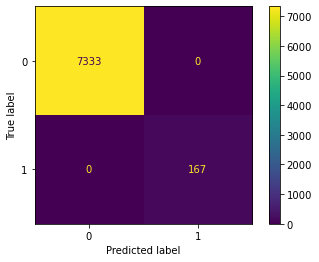

In [137]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, confusion_matrix
plot_confusion_matrix(model, X_test, y_pred)
confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(acc)

In [138]:
confusion_matrix(y_test, y_pred)

array([[7312,   11],
       [  21,  156]], dtype=int64)

In [139]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7323
           1       0.93      0.88      0.91       177

    accuracy                           1.00      7500
   macro avg       0.97      0.94      0.95      7500
weighted avg       1.00      1.00      1.00      7500



In [140]:
s_x = [[105, 80, 65, 85]]
model.predict(s_x)

array([0], dtype=int64)

In [141]:
import pickle
filename = 'final_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [142]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(s_x)
print(result)

[0]
